# Neural Network Exploration: Learning XOR

## Introduction

In this portfolio, I explore how neural network architecture and hyperparameters affect learning on the XOR problem.

XOR is a classic example of a non-linearly separable task, which makes it a useful benchmark for understanding why hidden layers and activation functions are necessary in neural networks.

The goal of this experiment is to investigate:
- How network depth affects model capacity
- How activation functions influence learning
- How learning rate impacts optimization dynamics

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# XOR dataset
X = torch.tensor([[0.,0.],
                  [0.,1.],
                  [1.,0.],
                  [1.,1.]], dtype=torch.float32)
y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]], dtype=torch.float32)

## Model Design

I implemented a fully connected neural network in PyTorch.
The architecture is configurable so that I can vary:

- Number of hidden layers
- Hidden layer size
- Activation function

The output layer produces logits, and I use BCEWithLogitsLoss for binary classification.

In [ ]:
# Model builder: lets you change layers + activation
def make_model(hidden_sizes=(8, 8), activation="relu"):
    acts = {
        "relu": nn.ReLU(),
        "tanh": nn.Tanh(),
        "sigmoid": nn.Sigmoid(),
    }
    act = acts[activation]

    layers = []
    in_dim = 2
    for h in hidden_sizes:
        layers.append(nn.Linear(in_dim, h))
        layers.append(act)
        in_dim = h
    layers.append(nn.Linear(in_dim, 1))   # output logits
    return nn.Sequential(*layers)

## Training Setup

The model is trained using stochastic gradient descent (SGD).
I record the training loss over time to visualize how gradient descent behaves under different configurations.

In [ ]:
# Train loop
def train(model, lr=0.1, steps=5000):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    losses = []
    for step in range(steps):
        optimizer.zero_grad()
        logits = model(X)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

## Experimental Design

To understand how architecture and hyperparameters affect learning,
I conduct controlled experiments where I vary:

1. Number of hidden layers
2. Activation function (ReLU vs Tanh)
3. Learning rate magnitude

In [ ]:
# Run a few experiments
experiments = [
    {"name": "1 hidden layer (8), relu, lr=0.1", "hidden": (8,), "act":"relu", "lr":0.1},
    {"name": "2 hidden layers (8,8), relu, lr=0.1", "hidden": (8,8), "act":"relu", "lr":0.1},
    {"name": "2 hidden layers (8,8), tanh, lr=0.1", "hidden": (8,8), "act":"tanh", "lr":0.1},
    {"name": "2 hidden layers (8,8), relu, lr=1.0", "hidden": (8,8), "act":"relu", "lr":1.0}]

all_losses = {}
for exp in experiments:
    model = make_model(hidden_sizes=exp["hidden"], activation=exp["act"])
    losses = train(model, lr=exp["lr"], steps=3000)
    all_losses[exp["name"]] = losses

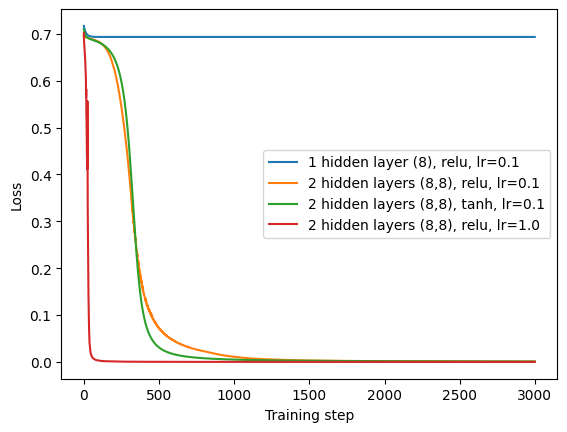

In [ ]:
# Plot loss curves
plt.figure()
for name, losses in all_losses.items():
    plt.plot(losses, label=name)
plt.xlabel("Training step")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Results and Analysis

From the loss curves, I observed several clear patterns.

First, the model with only one hidden layer struggled to reduce the loss effectively. Compared to the deeper models, its loss remained relatively high throughout training. This suggests that a shallow network does not have enough representational capacity to model the non-linear structure of the XOR problem.

When I increased the network to two hidden layers, the model was able to successfully learn XOR. The loss decreased steadily and eventually converged close to zero. This indicates that adding depth improves the model’s ability to capture more complex decision boundaries.

When comparing activation functions, both ReLU and Tanh were able to solve the task. However, their convergence behaviors were slightly different. One configuration converged faster, while the other showed a smoother loss curve. This reflects how different activation functions influence gradient flow during training.

Finally, increasing the learning rate to 1.0 significantly accelerated convergence. The loss dropped very quickly during the early stages of training. However, for more complex or larger datasets, such a high learning rate may lead to unstable optimization.

Overall, these experiments helped me better understand how architectural choices and optimization settings directly affect learning behavior.

## Limitations and Reflection

In this experiment, I manually constructed four possible input combinations for the XOR problem. Due to its extremely simple setup, it doesn't reflect the complexity of real-world machine learning tasks.

This experiment allowed me to observe more clearly anything that happened during training. By observing the loss curve, I could visually see how changing the number of layers, activation function, and learning rate affected the model's behavior.

Therefore, this portfolio deepened my understanding of fundamental neural network concepts and inspired me to try different architectures and optimization schemes.